|课程名称：数据挖掘|学生姓名：邓力予|学生学号：20201910442|
|-|-|-|
|实验名称：第八章|
|学院：数学与统计学院|专业：数据科学与大数据技术|年级：2020级|

# 导入需要的包

In [1]:
from pandas import read_csv,DataFrame
from sklearn.tree import DecisionTreeClassifier,plot_tree
from matplotlib import pyplot as plt
from os import mkdir
from os.path import exists

# 数据读取

In [2]:
data_train=read_csv("./练习数据Datasets/movie_learning.csv")
data_test=read_csv("./练习数据Datasets/movie_test.csv")

- 变量转换

In [3]:
data_train.replace({"competition":{"Low":0,"Medium":1,"High":3},"MPAA":{"G":0,"PG":1,"PG13":2,"R":4},"star":{"A":0,"B":1,"C":2},"genre":{"Action":0,"Cartoon":1,"Comedy":2,"Docum":3,"Horror":4,"ModerDrama":5,"SciFi":6,"Thriller":7},"TechEffect":{"Low":0,"Medium":1,"High":2}},inplace=True)
data_test.replace({"competition":{"Low":0,"Medium":1,"High":3},"MPAA":{"G":0,"PG":1,"PG13":2,"R":4},"star":{"A":0,"B":1,"C":2},"genre":{"Action":0,"Cartoon":1,"Comedy":2,"Docum":3,"Horror":4,"ModerDrama":5,"SciFi":6,"Thriller":7},"TechEffect":{"Low":0,"Medium":1,"High":2}},inplace=True)

-  拆分因/自变量，测试集

In [4]:
data_train_x=data_train.iloc[:,1:-2]
data_train_cat_y=data_train.iloc[:,-2]
data_train_cat2_y=data_train.iloc[:,-1]

data_test_x=data_test.iloc[:,1:-2]
data_test_cat_y=data_test.iloc[:,-2]
data_test_cat2_y=data_test.iloc[:,-1]

# GrossCat2

## 建立模型

In [5]:
model_cat2=DecisionTreeClassifier(max_depth=5)
model_cat2.fit(data_train_x,data_train_cat2_y)

DecisionTreeClassifier(max_depth=5)

## 模型可视化

[Text(0.5, 0.9166666666666666, 'x[6] <= 2373.5\ngini = 0.43\nsamples = 115\nvalue = [79, 36]'),
 Text(0.21052631578947367, 0.75, 'x[6] <= 1215.5\ngini = 0.228\nsamples = 84\nvalue = [73, 11]'),
 Text(0.15789473684210525, 0.5833333333333334, 'gini = 0.0\nsamples = 52\nvalue = [52, 0]'),
 Text(0.2631578947368421, 0.5833333333333334, 'x[6] <= 1766.0\ngini = 0.451\nsamples = 32\nvalue = [21, 11]'),
 Text(0.15789473684210525, 0.4166666666666667, 'x[6] <= 1514.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.10526315789473684, 0.25, 'x[6] <= 1407.5\ngini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.05263157894736842, 0.08333333333333333, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.15789473684210525, 0.08333333333333333, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.21052631578947367, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.3684210526315789, 0.4166666666666667, 'x[3] <= 4.5\ngini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(0.3157894736842105, 0.

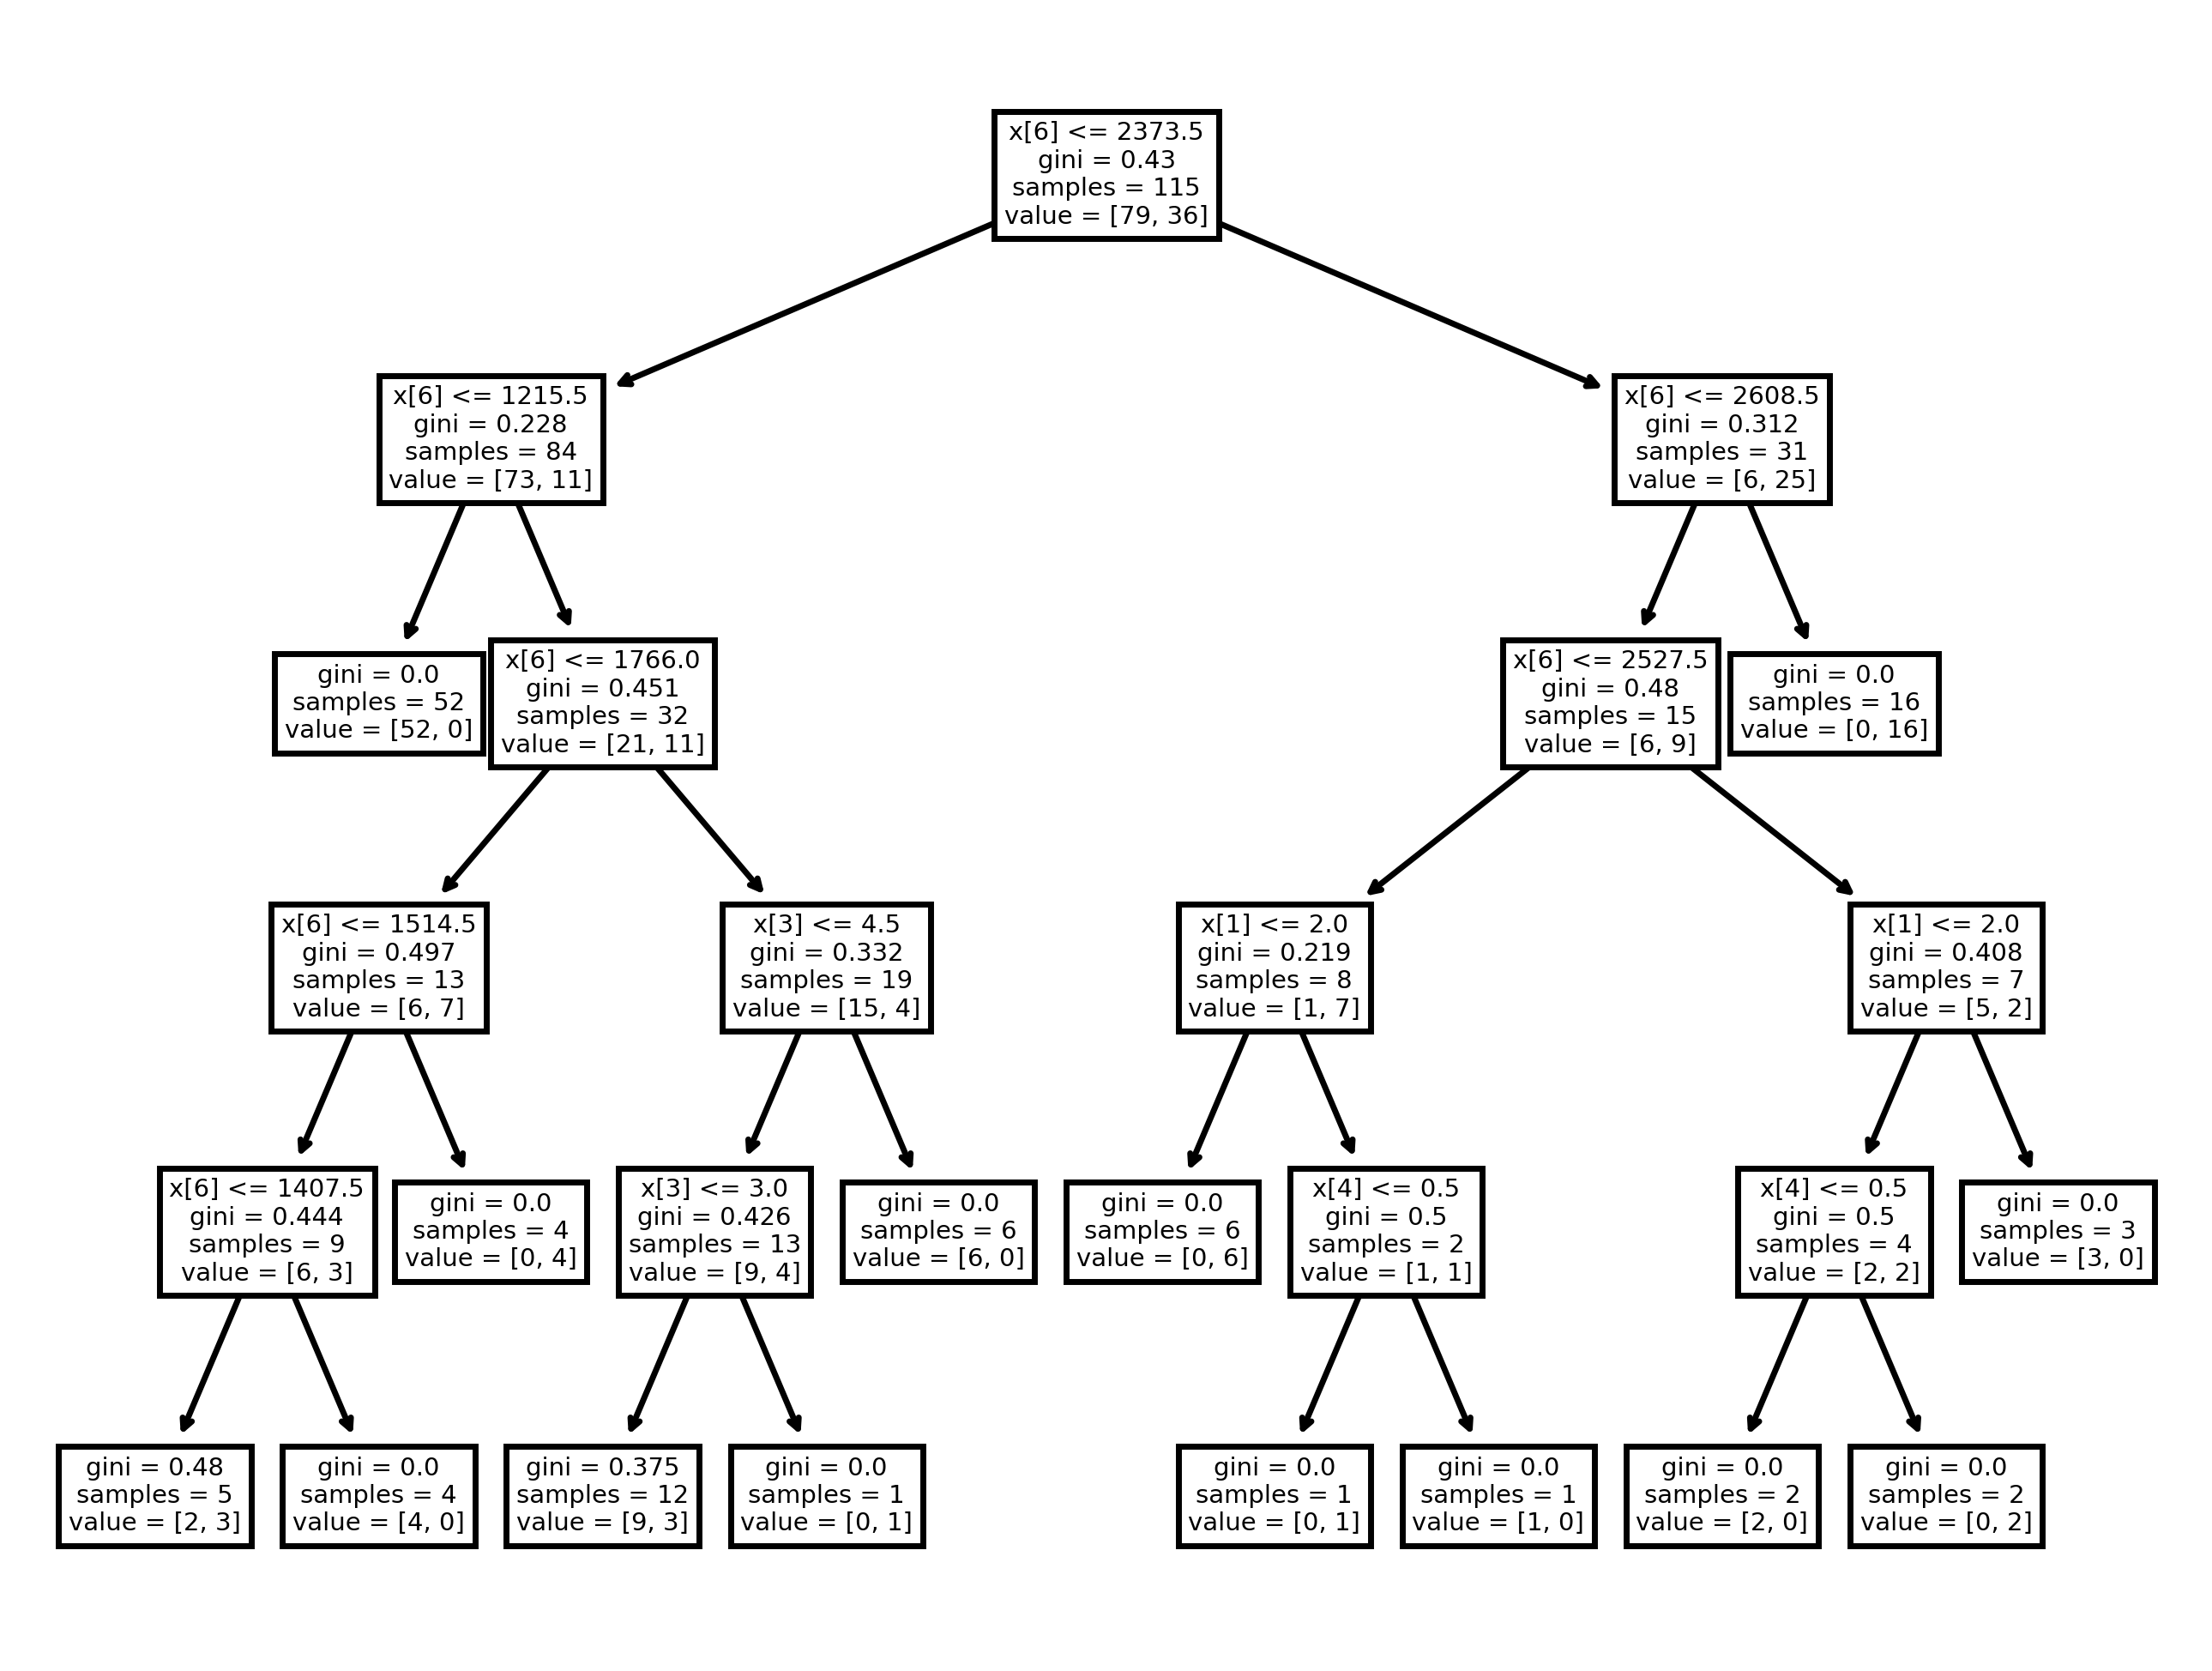

In [6]:
fig = plt.figure(dpi=500)
plot_tree(model_cat2)

## 预测与真实对比表

In [7]:
data_cat2_pre_y=model_cat2.predict(data_test_x)

In [8]:
tree_cat2=DataFrame((data_cat2_pre_y,data_test_cat2_y),index=("预测值","真实值"))
print(tree_cat2)
if not exists("model_results"):
    mkdir("model_results")
tree_cat2.to_csv("model_results/tree_cat2.csv.xz",compression="xz")

     0   1   2   3   4   5   6   7   8   9   ...  19  20  21  22  23  24  25  \
预测值   0   0   0   1   0   0   0   0   0   0  ...   0   1   0   1   1   0   1   
真实值   0   0   0   0   1   0   0   0   0   0  ...   0   0   1   1   1   1   1   

     26  27  28  
预测值   1   1   0  
真实值   1   1   1  

[2 rows x 29 columns]


# GrossCat

## 建立模型

In [9]:
model_cat=DecisionTreeClassifier(max_depth=5)
model_cat.fit(data_train_x,data_train_cat_y)

DecisionTreeClassifier(max_depth=5)

## 模型可视化

[Text(0.4140625, 0.9166666666666666, 'x[6] <= 521.5\ngini = 0.776\nsamples = 115\nvalue = [17, 36, 26, 23, 13]'),
 Text(0.125, 0.75, 'x[6] <= 36.5\ngini = 0.513\nsamples = 41\nvalue = [17, 23, 1, 0, 0]'),
 Text(0.09375, 0.5833333333333334, 'gini = 0.0\nsamples = 12\nvalue = [12, 0, 0, 0, 0]'),
 Text(0.15625, 0.5833333333333334, 'x[0] <= 3.0\ngini = 0.34\nsamples = 29\nvalue = [5, 23, 1, 0, 0]'),
 Text(0.0625, 0.4166666666666667, 'x[6] <= 55.0\ngini = 0.48\nsamples = 10\nvalue = [4, 6, 0, 0, 0]'),
 Text(0.03125, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0, 0]'),
 Text(0.09375, 0.25, 'x[6] <= 259.5\ngini = 0.375\nsamples = 8\nvalue = [2, 6, 0, 0, 0]'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.245\nsamples = 7\nvalue = [1, 6, 0, 0, 0]'),
 Text(0.125, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0]'),
 Text(0.25, 0.4166666666666667, 'x[3] <= 4.0\ngini = 0.194\nsamples = 19\nvalue = [1, 17, 1, 0, 0]'),
 Text(0.21875, 0.25, 'x[6] <= 176.5\ngini = 0.406\nsam

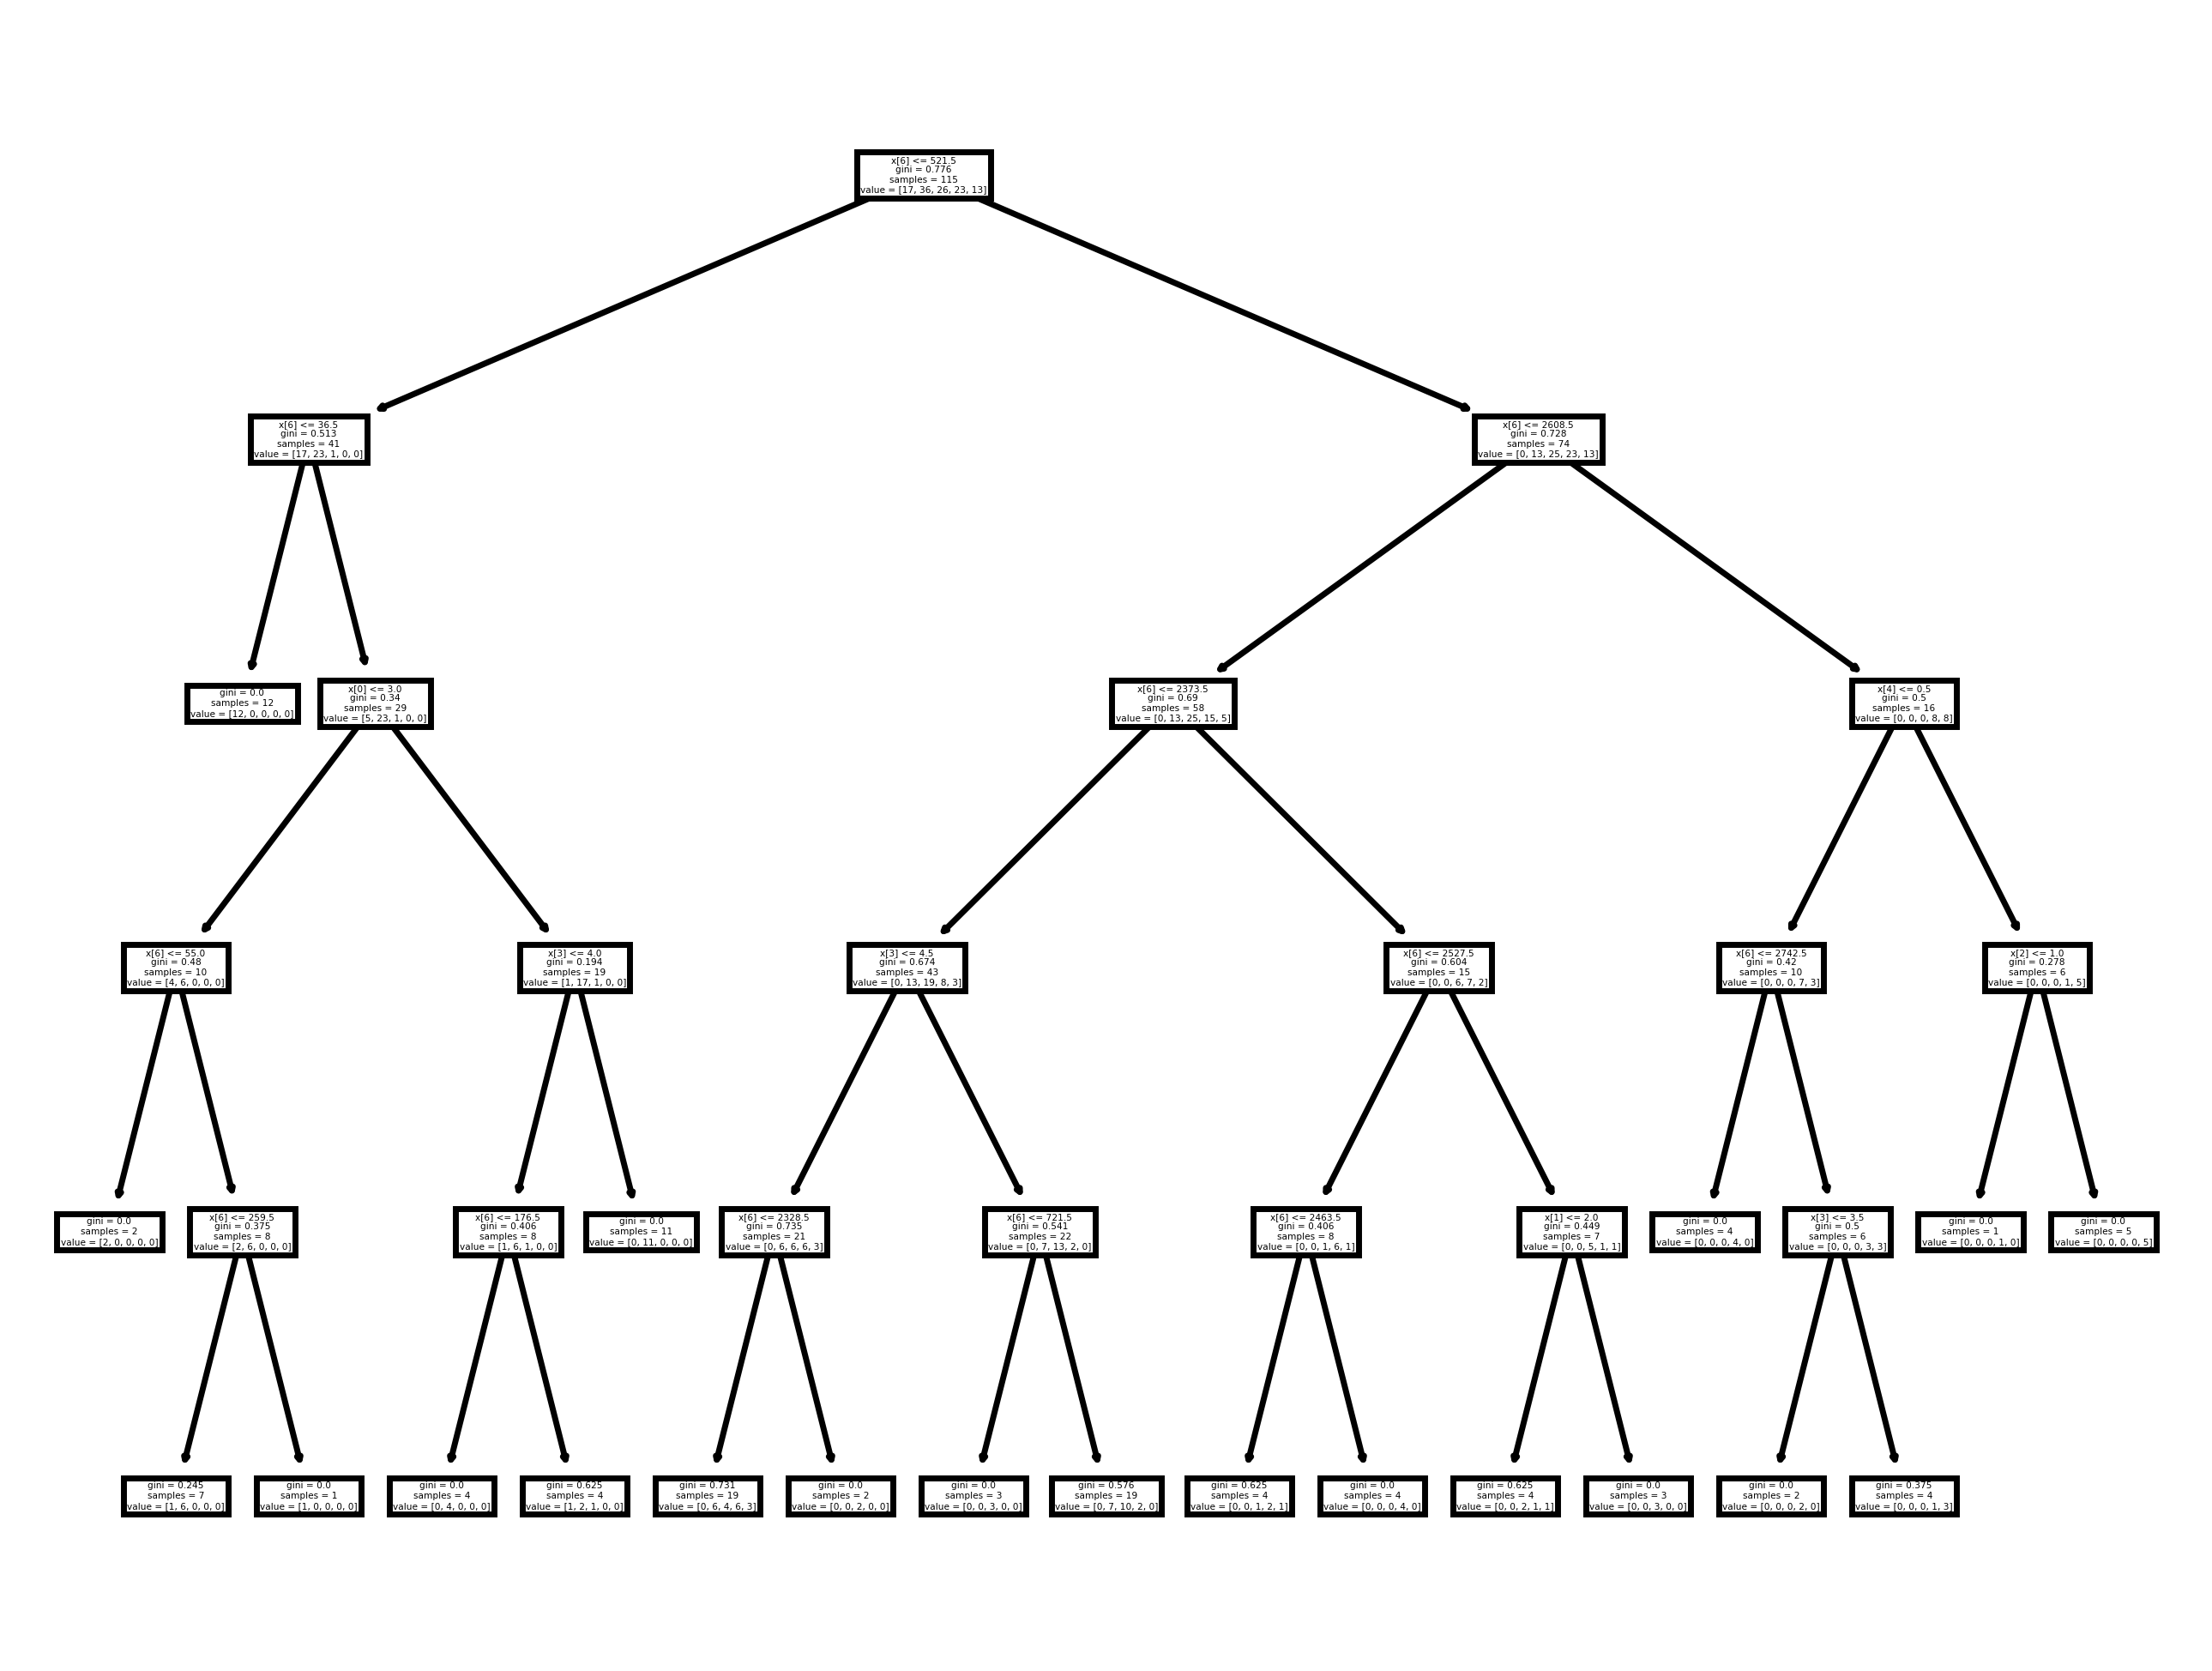

In [10]:
fig = plt.figure(dpi=500)
plot_tree(model_cat)

## 预测与真实对比表

In [11]:
data_cat_pre_y=model_cat.predict(data_test_x)

In [12]:
tree_cat=DataFrame((data_cat_pre_y,data_test_cat_y),index=("预测值","真实值"))
print(tree_cat)
if not exists("model_results"):
    mkdir("model_results")
tree_cat.to_csv("model_results/tree_cat.csv.xz",compression="xz")

     0   1   2   3   4   5   6   7   8   9   ...  19  20  21  22  23  24  25  \
预测值   2   3   2   4   3   1   1   2   2   3  ...   2   4   3   4   4   3   5   
真实值   2   2   2   3   4   1   1   2   2   2  ...   3   3   5   5   5   5   5   

     26  27  28  
预测值   3   4   2  
真实值   4   4   4  

[2 rows x 29 columns]
